In [36]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from sklearn.tree import DecisionTreeClassifier as dtc, DecisionTreeRegressor as dtr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# X, Y = load_breast_cancer(return_X_y=True)
# print(X,Y)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
# print(X_train,X_test, Y_train, Y_test)

In [ ]:
# clf = DecisionTreeClassifier(random_state=0)
# path = clf.cost_complexity_pruning_path(X_train, Y_train)
# ccp_alphas = path.ccp_alphas
# print(ccp_alphas)

In [ ]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',

'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

#digitize labels
label = pre.LabelEncoder()


out = label.fit_transform(Outlook)
#mapthem
out_m = dict(zip(label.classes_, label.transform(label.classes_)))
print(out_m)

#digitize
temp = label.fit_transform(Temperature)
#mapthem
temp_m = dict(zip(label.classes_, label.transform(label.classes_)))
print(temp_m)

#digitize
hum = label.fit_transform(Humidity)
#mapthem
hum_m = dict(zip(label.classes_, label.transform(label.classes_)))
print(hum_m)

#digitize
win = label.fit_transform(Wind)
#mapthem
win_m = dict(zip(label.classes_, label.transform(label.classes_)))
print(win_m)

#digitize
play = label.fit_transform(Play)
#mapthem
play_m = dict(zip(label.classes_, label.transform(label.classes_)))
print(play_m)

array = np.array([out,temp,hum,win,play])
array_without = np.transpose(array[:-1])
array = np.transpose(array)
print(array)
print(array_without)

In [ ]:
dataset = pd.DataFrame(array, columns=['Outlook','Temperature','Humidity','Wind','Play'])
print(dataset)

In [40]:
train_x,test_x, train_y, test_y = train_test_split(array_without, play,test_size=0.5,random_state=1)

In [ ]:
dt = dtr(random_state=0)
dt.fit(train_x, train_y)
print(dt)
pred_y = dt.predict(test_x)
print("Accuracy: ",metrics.accuracy_score(test_y,pred_y))

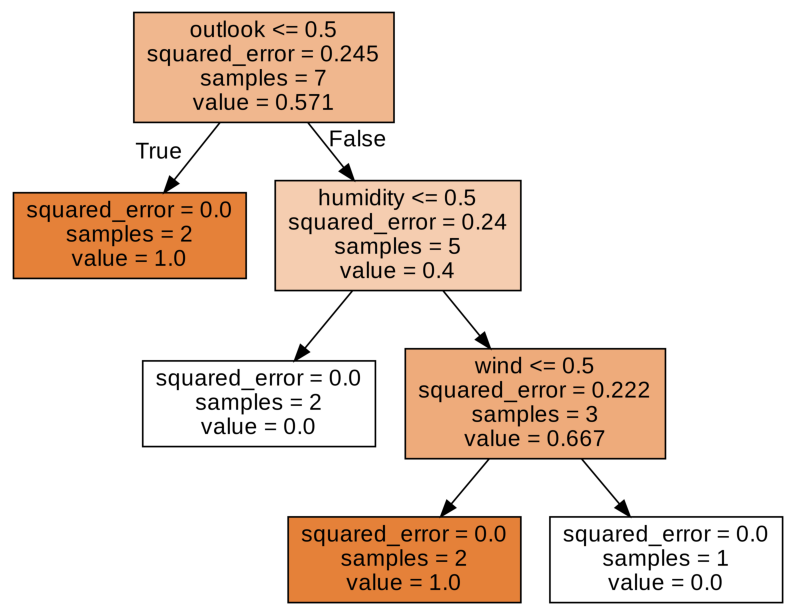

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file='tree_entropy.dot',feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],
filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
#plt.show();